In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_regression
import re
from sklearn.feature_selection import SelectKBest, f_classif, f_regression, mutual_info_regression
from sklearn.feature_selection import RFECV, RFE
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import shap
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import optuna
from metrics import *
from xgboost import XGBClassifier, XGBRegressor
from scipy.spatial import distance
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn as sns
import joblib

/home/kamila/.pyenv/versions/3.9.0/lib/python3.9/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


In [2]:
df = pd.read_csv('dataset_reduzido_renomeadas2.csv')#, encoding='ISO-8859-1', sep=";")

In [3]:
#pd.set_option('display.max_columns', None)
df

,A004_nao_sabe_escolaridade_mae,A010A_tem_tv_a_cabo,A005_nao_sabe_escolaridade_pai,A007_vez_enquanto_contratam_domestica,A017B_faz_curso_mais_de_2_horas,A009A_nenhuma_geladeira_em_casa,A003A_mora_com_mae_madrasta,A002_alunos_brancos,A009B_1_tablet_em_casa,A018C_nunca_le_quadrinhos,...,P001_prof_pardo,P115_estimula_aluno_expressar_opiniao_semanal,P022_assiste_telejornal_sempre,P080_reuniu_conselho_classe_mais_3_vezes,P094_alunos_respeitam_acordos_discordo,P075_ppp_discutido_em_reuniao_sim,P064_aprimorar_aval_contribuiu_muito,P095_alunos_chegam_pontualmente_concordo,ID_ESCOLA,MEDIA_FINAL
0,0.119718,0.338028,0.211268,0.091549,0.056338,0.014085,0.732394,0.225352,0.161972,0.591549,...,0.250000,0.125,0.375000,0.375000,0.062500,0.375000,0.062500,0.375000,11025638,269.215
1,0.053333,0.366667,0.140000,0.100000,0.120000,0.000000,0.786667,0.353333,0.100000,0.586667,...,0.200000,0.100,0.200000,0.200000,0.200000,0.200000,0.100000,0.100000,11007885,302.270
2,0.102679,0.303571,0.214286,0.084821,0.196429,0.004464,0.812500,0.258929,0.147321,0.531250,...,0.142857,0.000,0.000000,0.095238,0.047619,0.095238,0.142857,0.047619,11007893,278.880
3,0.204082,0.255102,0.408163,0.040816,0.132653,0.020408,0.683673,0.153061,0.071429,0.367347,...,0.500000,0.125,0.250000,0.500000,0.000000,0.375000,0.250000,0.375000,11026197,248.260
4,0.093897,0.403756,0.201878,0.136150,0.178404,0.000000,0.826291,0.319249,0.112676,0.582160,...,0.000000,0.050,0.050000,0.250000,0.050000,0.250000,0.000000,0.150000,11026278,288.490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4602,0.092391,0.358696,0.255435,0.043478,0.228261,0.010870,0.858696,0.211957,0.184783,0.483696,...,0.300000,0.000,0.000000,0.200000,0.100000,0.200000,0.000000,0.000000,53012542,282.615
4603,0.061856,0.412371,0.134021,0.072165,0.237113,0.000000,0.876289,0.226804,0.164948,0.536082,...,0.250000,0.000,0.250000,0.500000,0.250000,0.250000,0.000000,0.250000,53013840,280.915
4604,0.059701,0.373134,0.164179,0.059701,0.343284,0.000000,0.791045,0.149254,0.164179,0.522388,...,0.000000,0.250,0.000000,0.500000,0.250000,0.250000,0.000000,0.000000,53014308,298.720
4605,0.082474,0.443299,0.257732,0.072165,0.175258,0.000000,0.783505,0.247423,0.206186,0.639175,...,0.125000,0.125,0.000000,0.250000,0.000000,0.125000,0.250000,0.000000,53051009,297.660


# Rodar o modelo XG Boost

In [4]:
escolas_ids = [26035553, 29387019, 31000311, 43040918, 21243875, 26027836, 13001345, 21315604]

df_filtered = df[~df['ID_ESCOLA'].isin(escolas_ids)]

df_drop = df_filtered.drop(['MEDIA_FINAL', 'ID_ESCOLA'], axis=1)

In [5]:
X = df_drop
y = df_filtered['MEDIA_FINAL']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [6]:
# No seu notebook, depois de fazer o train_test_split

# Supondo que o seu DataFrame de treino se chama X_train
X_train.to_csv('X_train_background.csv', index=False)

In [7]:
y_pred = xgb_model.predict(X_val)

In [8]:
error_metrics(y_val, xgb_model.predict(X_val))

RMSE:  108.4405299439852
Max error:  40.33767456054687
MAPE:  0.029992786688115593
R2:  0.7047010682841605
MAE:  8.120450061711116


In [9]:
joblib.dump(xgb_model, 'modelo_xgboost.pkl') 

['modelo_xgboost.pkl']

In [10]:
# Criar um DataFrame para comparar previsões e valores reais
resultado = X_val.copy()
resultado['REAL'] = y_val.values
resultado['PRED'] = y_pred

resultado

,A004_nao_sabe_escolaridade_mae,A010A_tem_tv_a_cabo,A005_nao_sabe_escolaridade_pai,A007_vez_enquanto_contratam_domestica,A017B_faz_curso_mais_de_2_horas,A009A_nenhuma_geladeira_em_casa,A003A_mora_com_mae_madrasta,A002_alunos_brancos,A009B_1_tablet_em_casa,A018C_nunca_le_quadrinhos,...,P001_prof_pardo,P115_estimula_aluno_expressar_opiniao_semanal,P022_assiste_telejornal_sempre,P080_reuniu_conselho_classe_mais_3_vezes,P094_alunos_respeitam_acordos_discordo,P075_ppp_discutido_em_reuniao_sim,P064_aprimorar_aval_contribuiu_muito,P095_alunos_chegam_pontualmente_concordo,REAL,PRED
3688,0.154639,0.329897,0.268041,0.072165,0.103093,0.000000,0.824742,0.226804,0.175258,0.371134,...,0.200000,0.000000,0.200000,0.400000,0.100000,0.300000,0.300000,0.200000,286.780,276.115631
4473,0.078947,0.355263,0.302632,0.039474,0.026316,0.000000,0.750000,0.210526,0.236842,0.526316,...,0.166667,0.166667,0.333333,0.666667,0.166667,0.333333,0.000000,0.333333,290.560,286.497345
2589,0.096939,0.362245,0.219388,0.102041,0.244898,0.005102,0.801020,0.214286,0.122449,0.535714,...,0.200000,0.000000,0.100000,0.200000,0.000000,0.500000,0.300000,0.400000,271.845,276.537994
69,0.224576,0.491525,0.343220,0.093220,0.135593,0.021186,0.686441,0.072034,0.097458,0.271186,...,0.333333,0.055556,0.222222,0.277778,0.166667,0.222222,0.222222,0.222222,255.335,247.799973
1849,0.123288,0.301370,0.342466,0.082192,0.082192,0.013699,0.753425,0.095890,0.095890,0.424658,...,0.000000,0.166667,0.166667,0.000000,0.166667,0.666667,0.666667,0.500000,256.090,254.337769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,0.246862,0.297071,0.389121,0.092050,0.046025,0.008368,0.728033,0.213389,0.092050,0.539749,...,0.357143,0.071429,0.214286,0.285714,0.000000,0.500000,0.428571,0.428571,260.720,262.537445
4357,0.068966,0.551724,0.172414,0.034483,0.103448,0.000000,0.620690,0.379310,0.172414,0.758621,...,0.000000,0.000000,0.333333,1.000000,0.333333,0.666667,0.333333,0.000000,273.860,261.214539
3032,0.147465,0.483871,0.253456,0.133641,0.262673,0.004608,0.815668,0.313364,0.258065,0.479263,...,0.076923,0.076923,0.076923,0.230769,0.076923,0.307692,0.153846,0.230769,276.770,277.892242
3460,0.172840,0.530864,0.296296,0.024691,0.296296,0.000000,0.777778,0.246914,0.209877,0.382716,...,0.400000,0.000000,0.400000,0.400000,0.000000,0.200000,0.600000,0.800000,263.945,267.353424


In [11]:
#pd.set_option('display.max_columns', None)
escolas_ids = [26035553, 29387019, 31000311, 43040918, 21243875, 26027836, 13001345, 21315604]
escolas = df[df['ID_ESCOLA'].isin(escolas_ids)]
escolas

,A004_nao_sabe_escolaridade_mae,A010A_tem_tv_a_cabo,A005_nao_sabe_escolaridade_pai,A007_vez_enquanto_contratam_domestica,A017B_faz_curso_mais_de_2_horas,A009A_nenhuma_geladeira_em_casa,A003A_mora_com_mae_madrasta,A002_alunos_brancos,A009B_1_tablet_em_casa,A018C_nunca_le_quadrinhos,...,P001_prof_pardo,P115_estimula_aluno_expressar_opiniao_semanal,P022_assiste_telejornal_sempre,P080_reuniu_conselho_classe_mais_3_vezes,P094_alunos_respeitam_acordos_discordo,P075_ppp_discutido_em_reuniao_sim,P064_aprimorar_aval_contribuiu_muito,P095_alunos_chegam_pontualmente_concordo,ID_ESCOLA,MEDIA_FINAL
102,0.227273,0.227273,0.227273,0.181818,0.272727,0.590909,0.636364,0.000000,0.045455,0.181818,...,0.000000,0.333333,0.666667,0.666667,0.333333,0.333333,0.000000,1.000000,13001345,210.585
415,0.222222,0.460317,0.301587,0.095238,0.126984,0.015873,0.714286,0.095238,0.063492,0.380952,...,0.500000,0.000000,0.500000,0.000000,0.000000,0.250000,0.500000,0.250000,21243875,226.320
618,0.290323,0.322581,0.370968,0.080645,0.209677,0.032258,0.725806,0.145161,0.080645,0.322581,...,1.000000,0.333333,0.333333,0.333333,0.000000,0.833333,0.333333,1.000000,21315604,209.845
1264,0.218750,0.437500,0.291667,0.052083,0.052083,0.041667,0.677083,0.177083,0.145833,0.479167,...,0.333333,0.000000,0.500000,0.333333,0.000000,0.500000,0.333333,0.333333,26027836,304.555
1680,0.104575,0.320261,0.202614,0.111111,0.209150,0.013072,0.843137,0.124183,0.137255,0.464052,...,0.000000,0.166667,0.333333,0.166667,0.000000,0.333333,0.166667,0.333333,29387019,245.290


In [12]:
X_escolas = escolas.drop(['MEDIA_FINAL', 'ID_ESCOLA'], axis=1)

pred = xgb_model.predict(X_escolas)
escolas['PRED'] = pred

/tmp/ipykernel_1728/524957430.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escolas['PRED'] = pred


In [13]:
escolas[['ID_ESCOLA', 'MEDIA_FINAL', 'PRED']]

,ID_ESCOLA,MEDIA_FINAL,PRED
102,13001345,210.585,255.357422
415,21243875,226.320,252.354904
618,21315604,209.845,229.831421
1264,26027836,304.555,251.553040
1680,29387019,245.290,275.151154


# Analise com shap values

In [14]:
explainer = shap.Explainer(xgb_model, X_train)
joblib.dump(explainer, 'shap_explainer.pkl')
shap_values = explainer(X_val)

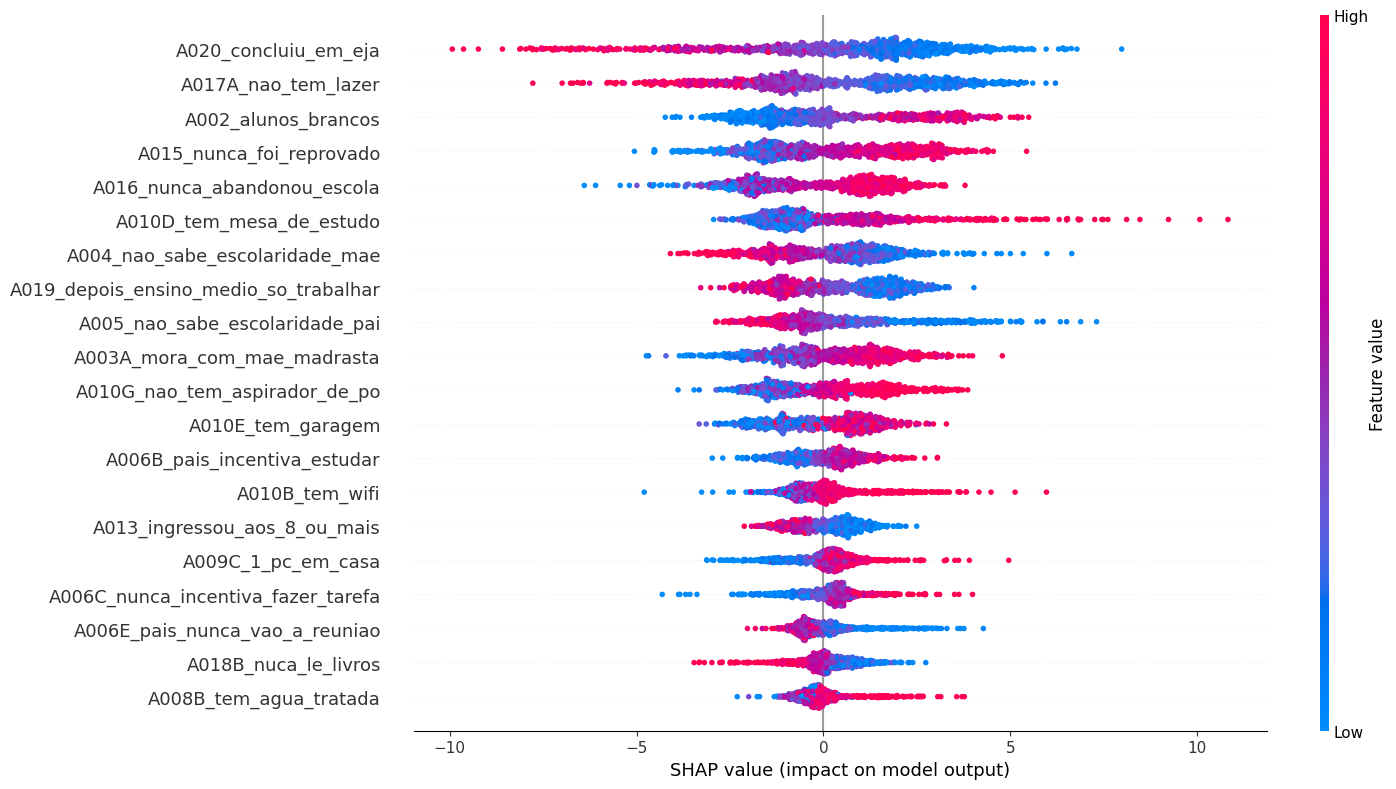

In [15]:
shap.summary_plot(shap_values, X_val, plot_size=[15,8])

In [16]:
escola_censo = pd.read_csv('../escolas_com_cep.csv', encoding='utf-8', sep=",")


In [17]:
escolas_ids = [21243875, 26027836, 31000311, 43040918, 21243875, 26027836, 13001345, 21315604, 15138963]
escola_interesse = escola_censo[escola_censo['CO_ENTIDADE'].isin(escolas_ids)]
escola_interesse

,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,NO_MESORREGIAO,CO_MESORREGIAO,...,NU_ENDERECO,DS_COMPLEMENTO,NO_BAIRRO,CO_CEP,NU_DDD,NU_TELEFONE,TP_SITUACAO_FUNCIONAMENTO,ID_MUNICIPIO,ID_ESCOLA,CEP_Formatado
2080,2019,Norte,1,Amazonas,AM,13,São Gabriel da Cachoeira,1303809,Norte Amazonense,1301,...,S/N,RIO TIQUIE,ZONA RURAL,69750000.0,97,34771176,1,1303809,13001345,69750000
5469,2019,Norte,1,Pará,PA,15,Vigia,1508209,Nordeste Paraense,1504,...,S/N,VILA DE SANTA ROSA,ZONA RURAL,68780000.0,91,87524001,1,1508209,15138963,68780000
7861,2019,Nordeste,2,Maranhão,MA,21,Grajaú,2104800,Centro Maranhense,2103,...,SN,NaN,POVOADO ALTO BRASIL,65940000.0,99,9.9172E8,1,2104800,21243875,65940000
9900,2019,Nordeste,2,Maranhão,MA,21,Urbano Santos,2112605,Leste Maranhense,2104,...,NaN,NaN,NaN,65530000.0,98,9.8881E8,1,2112605,21315604,65530000
19172,2019,Nordeste,2,Pernambuco,PE,26,Ibimirim,2606606,Sertão Pernambucano,2601,...,SN,NaN,CENTRO,56580000.0,87,38421034,1,2606606,26027836,56580000
29234,2019,Sudeste,3,Minas Gerais,MG,31,Belo Horizonte,3106200,Metropolitana de Belo Horizonte,3107,...,426,NaN,BARREIRO DE BAIXO,30640060.0,31,33845010,1,3106200,31000311,30640060
57727,2019,Sul,4,Rio Grande do Sul,RS,43,Santo Antônio do Palma,4317558,Noroeste Rio-grandense,4301,...,777,PREDIO,CENTRO,99265000.0,54,33941062,1,4317558,43040918,99265000


In [18]:
shap_values.values

array([[-0.8105553 ,  0.04628408,  0.00435652, ...,  0.12116363,
        -0.03821989, -0.04457612],
       [ 1.80545938,  0.11431698, -0.16234759, ..., -0.20838548,
         0.01324198, -0.00402737],
       [ 1.84164003,  0.04898146,  0.67216941, ...,  0.16394887,
         0.09684147,  0.2974694 ],
       ...,
       [ 0.66203086, -0.20567102, -0.05124562, ...,  0.02476006,
        -0.06697987,  0.1702993 ],
       [-1.48028642, -0.51218944, -0.45769965, ..., -1.76735439,
         0.53167313, -0.09638922],
       [ 1.31177086, -0.17561516,  3.00485654, ...,  0.07240118,
        -0.00859269, -0.08750109]])

In [19]:
X_val

,A004_nao_sabe_escolaridade_mae,A010A_tem_tv_a_cabo,A005_nao_sabe_escolaridade_pai,A007_vez_enquanto_contratam_domestica,A017B_faz_curso_mais_de_2_horas,A009A_nenhuma_geladeira_em_casa,A003A_mora_com_mae_madrasta,A002_alunos_brancos,A009B_1_tablet_em_casa,A018C_nunca_le_quadrinhos,...,P014_alunos_tem_prob_aprendizagem_concordo,P101_alunos_sob_efeito_drogas_nunca,P001_prof_pardo,P115_estimula_aluno_expressar_opiniao_semanal,P022_assiste_telejornal_sempre,P080_reuniu_conselho_classe_mais_3_vezes,P094_alunos_respeitam_acordos_discordo,P075_ppp_discutido_em_reuniao_sim,P064_aprimorar_aval_contribuiu_muito,P095_alunos_chegam_pontualmente_concordo
3688,0.154639,0.329897,0.268041,0.072165,0.103093,0.000000,0.824742,0.226804,0.175258,0.371134,...,0.300000,0.400000,0.200000,0.000000,0.200000,0.400000,0.100000,0.300000,0.300000,0.200000
4473,0.078947,0.355263,0.302632,0.039474,0.026316,0.000000,0.750000,0.210526,0.236842,0.526316,...,0.500000,0.000000,0.166667,0.166667,0.333333,0.666667,0.166667,0.333333,0.000000,0.333333
2589,0.096939,0.362245,0.219388,0.102041,0.244898,0.005102,0.801020,0.214286,0.122449,0.535714,...,0.300000,0.500000,0.200000,0.000000,0.100000,0.200000,0.000000,0.500000,0.300000,0.400000
69,0.224576,0.491525,0.343220,0.093220,0.135593,0.021186,0.686441,0.072034,0.097458,0.271186,...,0.111111,0.222222,0.333333,0.055556,0.222222,0.277778,0.166667,0.222222,0.222222,0.222222
1849,0.123288,0.301370,0.342466,0.082192,0.082192,0.013699,0.753425,0.095890,0.095890,0.424658,...,0.666667,0.666667,0.000000,0.166667,0.166667,0.000000,0.166667,0.666667,0.666667,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,0.246862,0.297071,0.389121,0.092050,0.046025,0.008368,0.728033,0.213389,0.092050,0.539749,...,0.357143,0.214286,0.357143,0.071429,0.214286,0.285714,0.000000,0.500000,0.428571,0.428571
4357,0.068966,0.551724,0.172414,0.034483,0.103448,0.000000,0.620690,0.379310,0.172414,0.758621,...,0.333333,0.666667,0.000000,0.000000,0.333333,1.000000,0.333333,0.666667,0.333333,0.000000
3032,0.147465,0.483871,0.253456,0.133641,0.262673,0.004608,0.815668,0.313364,0.258065,0.479263,...,0.230769,0.076923,0.076923,0.076923,0.076923,0.230769,0.076923,0.307692,0.153846,0.230769
3460,0.172840,0.530864,0.296296,0.024691,0.296296,0.000000,0.777778,0.246914,0.209877,0.382716,...,0.200000,0.200000,0.400000,0.000000,0.400000,0.400000,0.000000,0.200000,0.600000,0.800000


In [20]:
def criar_tabela_comparativa(dados_escola1, dados_escola2, nome_escola1, nome_escola2, model, X_treino):
    """Cria um DataFrame comparativo de SHAP values para duas escolas a partir dos dados brutos delas."""
    
    # Criar o explainer com base no modelo e nos dados de treino
    explainer = shap.Explainer(model, X_treino)
    
    # Garantir que os dados estejam no formato DataFrame
    if isinstance(dados_escola1, pd.Series):
        dados_escola1 = dados_escola1.to_frame().T
    if isinstance(dados_escola2, pd.Series):
        dados_escola2 = dados_escola2.to_frame().T

    # Calcular os SHAP values individualmente
    shap_escola1 = explainer(dados_escola1).values[0]
    shap_escola2 = explainer(dados_escola2).values[0]

    # Calcular diferença absoluta e selecionar top 20
    diff_abs = np.abs(shap_escola1 - shap_escola2)
    top_20_indices = np.argsort(diff_abs)[-20:][::-1]

    # Montar os dados da tabela
    dados_tabela = []
    for i in top_20_indices:
        feature = dados_escola1.columns[i]
        shap1 = shap_escola1[i]
        shap2 = shap_escola2[i]
        diff = shap1 - shap2
        dados_tabela.append([feature, shap1, shap2, diff])

    # Criar o DataFrame final
    colunas = [
        'Característica (Feature)', 
        f'SHAP ({nome_escola1})', 
        f'SHAP ({nome_escola2})', 
        'Diferença'
    ]
    tabela = pd.DataFrame(dados_tabela, columns=colunas)
    return tabela


## Notas Diferentes, Características Semelhantes
### 21243875 CENTRO DE ENSINO NICOLAU DINO 
### 26027836 ESCOLA INOCENCIO CORREIA LIMA

In [26]:
# Supondo que você tenha os dados das duas escolas como DataFrame (ou linha individual):
escolaA = df[df['ID_ESCOLA'] == 21243875].drop(['MEDIA_FINAL', 'ID_ESCOLA'], axis=1)
escolaB = df[df['ID_ESCOLA'] == 26027836].drop(['MEDIA_FINAL', 'ID_ESCOLA'], axis=1)

print("Visualização Comparativa (Grupo 1: Notas Diferentes, Características Semelhantes)")
tabela_grupo1 = criar_tabela_comparativa(
    escolaA, escolaB, 
    'Escola A (21243875)', 'Escola B (26027836)',
    xgb_model, X_train
)

display(tabela_grupo1.style.set_caption("Tabela 1: Comparação SHAP - Escola A vs. Escola B").format({
    'SHAP (Escola A (21243875))': '{:+.4f}',
    'SHAP (Escola B (26027836))': '{:+.4f}',
    'Diferença': '{:+.4f}'
}).background_gradient(cmap='coolwarm_r', subset=['Diferença']))


Visualização Comparativa (Grupo 1: Notas Diferentes, Características Semelhantes)


,Característica (Feature),SHAP (Escola A (21243875)),SHAP (Escola B (26027836)),Diferença
0,A019_depois_ensino_medio_so_trabalhar,+1.4173,-0.7656,+2.1829
1,A017D_estuda_mais_de_2_horas,+1.6472,-0.4301,+2.0773
2,A010G_nao_tem_aspirador_de_po,+2.2007,+0.3800,+1.8207
3,A007_vez_enquanto_contratam_domestica,-0.4084,+1.2691,-1.6775
4,A016_nunca_abandonou_escola,-2.8737,-1.7490,-1.1247
5,A012_transporte_carro,-0.2959,+0.8276,-1.1234
6,A006C_nunca_incentiva_fazer_tarefa,+0.6586,-0.4415,+1.1001
7,A010D_tem_mesa_de_estudo,-0.8164,-1.8221,+1.0056
8,A017E_trabalha_mais_de_2_horas,+0.0845,+0.9655,-0.8810
9,A009C_1_pc_em_casa,-1.7333,-0.8602,-0.8730


In [ ]:
shap.decision_plot(explainer.expected_value, shap_values_schools.values[0], df_schools.columns)

## Notas Semelhantes, Características Diferentes
### 13001345 ESCOLA ESTADUAL DOM MASSA
### 21315604 CENTRO DE ENSINO ESTER FLORA DE ARAUJO

In [ ]:
# --- Geração da Tabela para o Grupo 2 ---
print("\nVisualização Comparativa (Grupo 2: Notas Semelhantes, Características Diferentes)")
tabela_grupo2 = criar_tabela_comparativa(2, 3, '13001345', '21315604') 
display(tabela_grupo2.style.set_caption("Tabela 2: Comparação SHAP - Escola C vs. Escola D").format({
    'SHAP (Escola A (13001345))': '{:+.4f}',
    'SHAP (Escola A (21315604))': '{:+.4f}',
    'Diferença': '{:+.4f}'
}).background_gradient(cmap='coolwarm_r', subset=['Diferença']))